<a href="https://colab.research.google.com/github/LadyPary/DataMiningAssignments/blob/main/3-%20MLP%20and%20Clustering%20Algorithms/Part1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_______
# **<center> Data Mining </center>**
### **<center> Assignment No. 3 (Part 1)</center>**

#### <center>Zahra Rabbany Khorasgani</center> 
<center>610398124</center>

#### <center>Prof. Hedieh Sajedi</center>
#### <center>Department of Computer Science, Tehran University</center>

#### <center>May 2022</center>
_______



## **Importing**

In [ ]:
#Necessary packages

# dataset
from sklearn.datasets import fetch_lfw_people

# for data mining
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# for visualisation 
import matplotlib.pyplot as plt

import numpy as np

#**Part 1: Labeled Faces in the Wild face recognition dataset**

**Attribute Information:**

*   This dataset is a collection of JPEG pictures of famous people collected over the internet.


### **1.1. Load**

In [ ]:
# loading data
lfw_people = fetch_lfw_people(min_faces_per_person=150, resize=0.4)
x = lfw_people.data

# Each of the 1140 faces is assigned to a single person id in the target array. 
# The label to predict is the id of the person
y = lfw_people.target 

In [ ]:
number_of_samples, height, width = lfw_people.images.shape

In [ ]:
number_of_features = x.shape[1]

In [ ]:
target_names = lfw_people.target_names
number_of_classes = target_names.shape[0]

In [ ]:
print("Total dataset size:")
print("number_of_samples: %d" % number_of_samples)
print("number_of_features: %d" % number_of_features)
print("number_of_classes: %d" % number_of_classes)

Total dataset size:
number_of_samples: 766
number_of_features: 1850
number_of_classes: 2


### **1.2. Split train/test data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle = True)

### **1.3. Standardizing features**

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.

PCA is effected by scale so you need to scale the features in your data before applying PCA.

In [ ]:
#using StandardScaler to Standardizing X
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

### **1.4. PCA**
Computing eigenfaces using PCA for dimensionality reduction.


In [ ]:
number_of_components = 150

pca = PCA(n_components = number_of_components, 
          svd_solver='randomized',
          whiten=True).fit(X_train)

# Whitening makes our resulting data have a unit variance, 
# which has been shown to produce better results.

eigenfaces = pca.components_.reshape((number_of_components, height, width))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Visualizing the Eigenfaces (reduced components of faces).

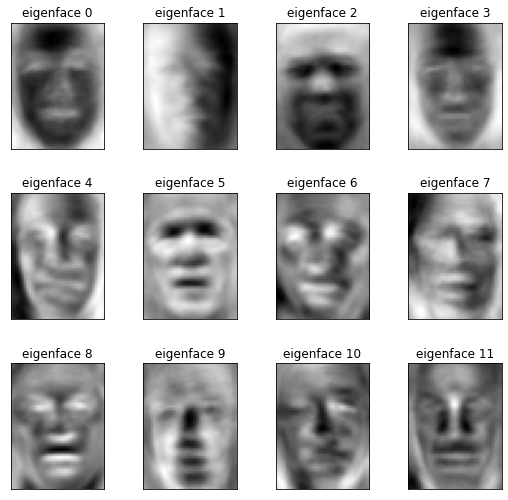

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, height, width)

plt.show()

### **1.5. Multi-layer Perceptron Classification**
Training, testing and the confusion matrix.

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

#### **1.5.1. Parameter Tuning**

Note: The default solver=‘adam’ works pretty well on relatively large datasets 
(with thousands of training samples or more) in terms of both training time and validation score.
For small datasets, however, ‘lbfgs’ can converge faster and perform better.


Finding a reasonable regularization parameter α is best done using GridSearchCV, usually in the range 10.0 ** - np.arange(1, 7).

In [ ]:
'''
clf_param_grid = {'solver': ['lbfgs'], 
                  'hidden_layer_sizes':[(i, j) for i in range(8,15) for j in range(2,6) if i>=j], 
                  'alpha': 10.0 ** -np.arange(1, 7), 
                  'random_state':list(range(1,10))}
clf = GridSearchCV(MLPClassifier(), clf_param_grid, n_jobs=-1)
'''
clf_param_grid = {'solver': ['lbfgs'], 
                  'hidden_layer_sizes':[(10, 2)], 
                  'alpha': 10.0 ** -np.arange(1, 7), 
                  'random_state':[1,8]}
clf = GridSearchCV(MLPClassifier(), clf_param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

1.0
{'alpha': 0.1, 'hidden_layer_sizes': (10, 2), 'random_state': 8, 'solver': 'lbfgs'}


#### **1.5.2. Training the Model**

In [ ]:
# after parameter toning
# (10,2)
clf = MLPClassifier(solver='lbfgs', alpha=0.1,
                    hidden_layer_sizes=(10, 2), random_state=8)
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 2), random_state=8,
              solver='lbfgs')

#### **1.5.3. Result of the Prediction**

After fitting (training), the model can predict labels for new samples:

In [ ]:
y_pred = clf.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print('clf confusion_matrix :\n', dt_cm)
print("-------------------------------")

Accuracy = round(accuracy_score(y_test, y_pred)* 100, 2)
Train_accuracy = round(clf.score(X_train,y_train)* 100, 2)
Test_accuracy = round(clf.score(X_test,y_test)* 100, 2)

print('Accuracy:', Accuracy ,'%')
print("Train accuracy:", Train_accuracy,'%')
print("Test accuracy:", Test_accuracy,'%')
print("-------------------------------")
print("classification_report:\n",classification_report(y_test, clf.predict(X_test)))

clf confusion_matrix :
 [[ 54   5]
 [  7 126]]
-------------------------------
Accuracy: 93.75 %
Train accuracy: 100.0 %
Test accuracy: 93.75 %
-------------------------------
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.96      0.95      0.95       133

    accuracy                           0.94       192
   macro avg       0.92      0.93      0.93       192
weighted avg       0.94      0.94      0.94       192



Visualising the prediction by plotting with Faces and train-test Prediction pairs.

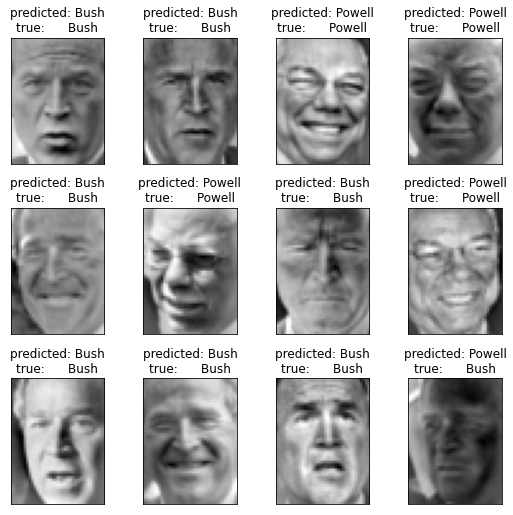

In [ ]:
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, height, width)

### **1.6. Interpretation**
Explained in the report.

#### **1.6.1. MLP Model**


#### **1.6.2. Confusion Matrix**


---